In [1]:

import os
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [2]:

# Load CSV file
df = pd.read_csv("/kaggle/input/cat-dog-images-for-classification/cat_dog.csv")


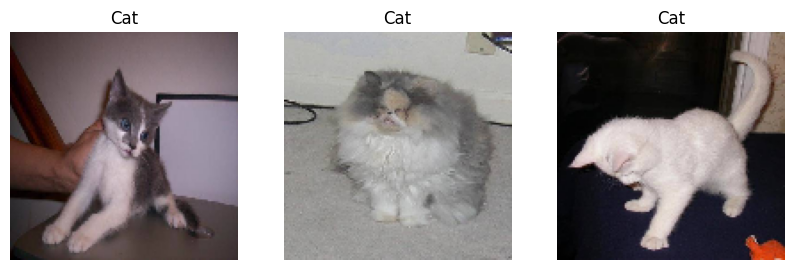

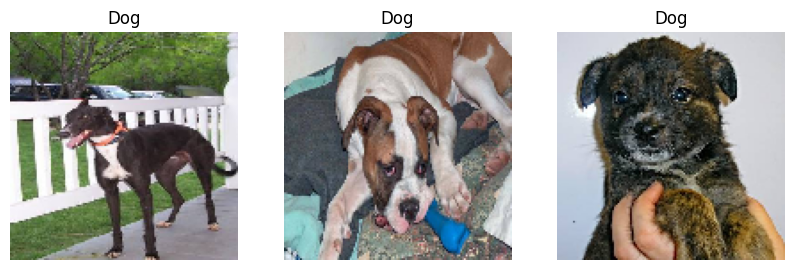

In [3]:
import matplotlib.pyplot as plt
# Set paths
image_dir = '/kaggle/input/cat-dog-images-for-classification/cat_dog'
# Image size
img_width, img_height = 128, 128

# Function to load and process images
def load_images(image_dir, df):
    images = []
    labels = []
    
    for index, row in df.iterrows():
        image_path = os.path.join(image_dir, row['image'])
        image = load_img(image_path, target_size=(img_width, img_height))
        image = img_to_array(image) / 255.0  # Normalize pixel values
        images.append(image)
        labels.append(row['labels'])
    
    return np.array(images), np.array(labels)


# Filter out images of cats and dogs
cat_images = df[df['labels'] == 0]['image'].values[:3]  # 0 for cats
dog_images = df[df['labels'] == 1]['image'].values[:3]  # 1 for dogs

# Function to display images
def display_images(image_paths, title):
    plt.figure(figsize=(10, 5))
    
    for i, img_path in enumerate(image_paths):
        img = load_img(os.path.join(image_dir, img_path), target_size=(img_width, img_height))
        plt.subplot(1, 3, i + 1)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    
    plt.show()

# Display 3 cat images
display_images(cat_images, 'Cat')

# Display 3 dog images
display_images(dog_images, 'Dog')


In [4]:
# Load images and labels
X, y = load_images(image_dir, df)

# One-hot encode labels (optional for binary classification)
y = to_categorical(y, num_classes=2)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout



In [6]:
# Build the CNN model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model with EarlyStopping
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


I0000 00:00:1728576912.364851     103 service.cc:145] XLA service 0x7c71440051f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728576912.364908     103 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 17/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5132 - loss: 0.7700

I0000 00:00:1728576916.412877     103 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.5931 - loss: 0.6596 - val_accuracy: 0.7484 - val_loss: 0.5049
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7545 - loss: 0.5075 - val_accuracy: 0.8046 - val_loss: 0.4219
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8006 - loss: 0.4289 - val_accuracy: 0.8144 - val_loss: 0.4109
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8372 - loss: 0.3706 - val_accuracy: 0.8376 - val_loss: 0.3703
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8600 - loss: 0.3214 - val_accuracy: 0.8504 - val_loss: 0.3489
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8890 - loss: 0.2678 - val_accuracy: 0.8490 - val_loss: 0.3617
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9088 - loss: 0.2120 - val_accuracy: 0.8578 - val_loss: 0.3855
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9337 - loss: 0.1665 - val_accuracy: 0.85

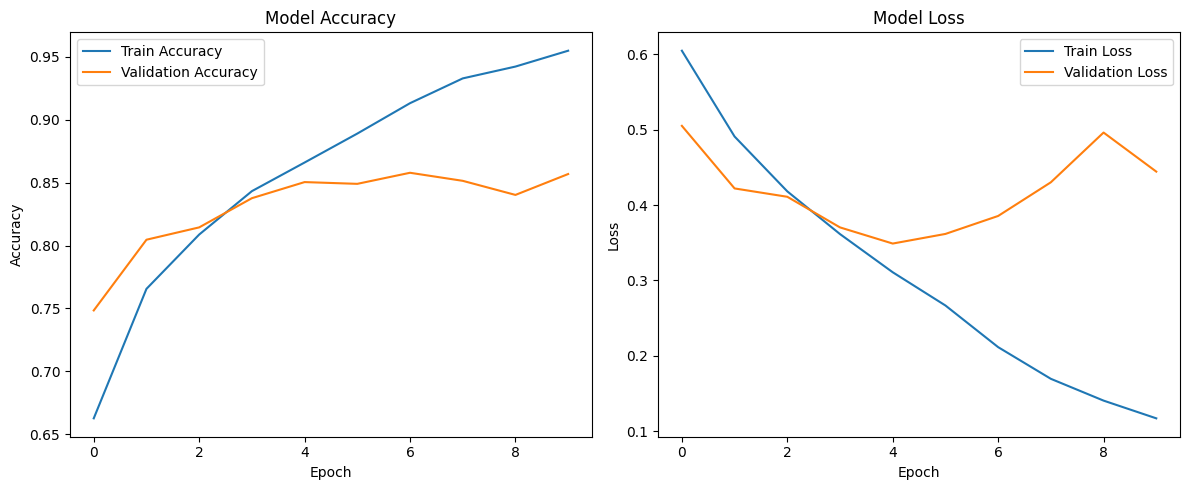

In [7]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}')


Test Accuracy: 0.8504


In [9]:
# Save the model
model.save('/kaggle/working/cat_dog_classifier.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Class: Cat


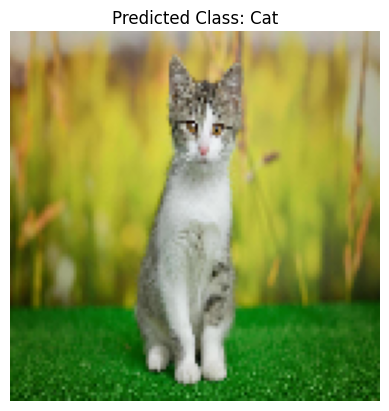

In [12]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Define the image size
img_width, img_height = 128, 128

# Function to load and prepare the image
def prepare_image(file_path):
    img = load_img(file_path, target_size=(img_width, img_height))
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    return np.expand_dims(img_array, axis=0), img  # Return both array and original image

# Path to the image
google_image_path = '/kaggle/input/cat-photo/cat.jpg'

# Prepare the image
new_image, original_image = prepare_image(google_image_path)

# Predict on the new image
prediction = model.predict(new_image)

# Get the predicted class
predicted_class = np.argmax(prediction, axis=1)
class_labels = ['Cat', 'Dog']

# Display the prediction and the image
print(f'Predicted Class: {class_labels[predicted_class[0]]}')

# Show the image with Matplotlib
plt.imshow(original_image)
plt.title(f'Predicted Class: {class_labels[predicted_class[0]]}')
plt.axis('off')  # Hide axis
plt.show()


In [11]:
def prepare_image(file_path):
    img = load_img(file_path, target_size=(img_width, img_height))
    img_array = img_to_array(img) / 255.0
    return np.expand_dims(img_array, axis=0)

# Predict on a new image
new_image = prepare_image('/kaggle/input/cat-photo/cat.jpg')
prediction = model.predict(new_image)

# Get the predicted class
predicted_class = np.argmax(prediction, axis=1)
class_labels = ['Cat', 'Dog']
print(f'Predicted Class: {class_labels[predicted_class[0]]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
Predicted Class: Cat
